#                     **Water Quality Prediction**




---
Members:
1. Salman Alam (19301037)
---
Dataset: https://www.kaggle.com/datasets/mssmartypants/water-quality?resource=download

# Data Preprocessing

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#importing data preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

#import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#importing outcome techniques
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/waterQuality1.csv.xls')
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [ ]:
df['is_safe'].unique()

array(['1', '0', '#NUM!'], dtype=object)

In [ ]:
df['is_safe'].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

In [ ]:
indexAge = df[ (df['is_safe'] == '#NUM!')].index
df.drop(indexAge , inplace=True)

In [ ]:
df['is_safe'].value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

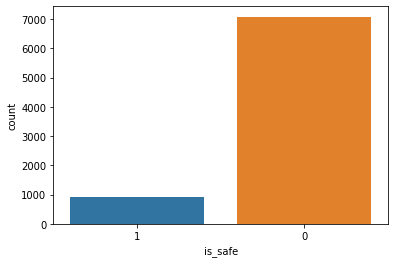

In [ ]:
sns.countplot(x='is_safe',data=asteriod)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   object 
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [ ]:
df['is_safe'] = df['is_safe'].astype(int)
df['ammonia'] = df['ammonia'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [ ]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [ ]:
# Feature Selection
features = ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', ]
label = ['is_safe']

In [ ]:
x_upsampled = df.loc[:, features]
y_upsampled = df.loc[:, label]

oversample = SMOTE()
x_upsampled, y_upsampled = oversample.fit_resample(x_upsampled, y_upsampled)

X_train_upsampled,X_test_upsampled,Y_train_upsampled,Y_test_upsampled = train_test_split(x_upsampled,y_upsampled,
                                                                                         random_state=0,train_size=0.75, stratify = y_upsampled)

print(X_train_upsampled.shape)
print(X_test_upsampled.shape)

(10626, 20)
(3542, 20)


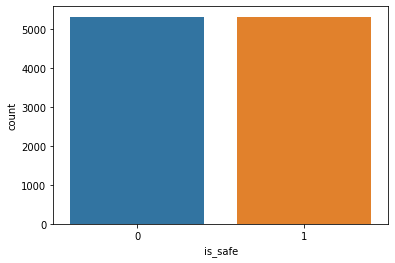

In [ ]:
sns.countplot(x='is_safe',data=Y_train_upsampled)
plt.show()

In [ ]:
scaler = MinMaxScaler()
train_scaled_upsampled = pd.DataFrame(scaler.fit_transform(X_train_upsampled)) # Scaling the train set
test_scaled_upsampled = pd.DataFrame(scaler.transform(X_test_upsampled)) # Scaling the test set

print(X_train_upsampled)

       aluminium    ammonia   arsenic    barium   cadmium  chloramine  \
12380   0.047441   0.874635  0.042794  0.264914  0.045353    0.010236   
5454    0.060000  18.580000  0.070000  1.430000  0.030000    0.210000   
6498    0.080000  14.250000  0.070000  1.100000  0.090000    0.100000   
9526    2.349732  28.251484  0.050000  1.119919  0.005372    1.010225   
12842   2.450668   4.808410  0.025318  0.556561  0.003936    2.591693   
...          ...        ...       ...       ...       ...         ...   
6202    0.030000  24.640000  0.060000  0.380000  0.000000    0.070000   
4511    0.070000  18.830000  0.040000  0.060000  0.100000    0.420000   
9073    0.025451  21.474727  0.031804  0.709179  0.052705    0.261103   
7729    0.090000   0.040000  0.080000  2.610000  0.010000    0.110000   
8973    0.129422  21.120000  0.040000  0.610000  0.005000    1.990000   

       chromium    copper  flouride  bacteria   viruses      lead   nitrates  \
12380  0.032794  0.045118  1.131146  0.0000

#Model Implementation

In [ ]:
LR_Model=LogisticRegression()
LR_Model.fit(train_scaled_upsampled,Y_train_upsampled)

# Predictions made
predict_train=LR_Model.predict(train_scaled_upsampled)
predict_test=LR_Model.predict(test_scaled_upsampled)

#Generate Outcomes
print('Accuracy: ', accuracy_score(Y_test_upsampled,predict_test)*100, '%')
print('Precision: ', precision_score(Y_test_upsampled,predict_test)*100, '%')
print('f1: ', f1_score(Y_test_upsampled,predict_test)*100, '%')

Accuracy:  80.18068887634105 %
Precision:  80.14664410603497 %
f1:  80.19187358916479 %


In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(train_scaled_upsampled,Y_train_upsampled)

# Predictions made
predict_train=knn.predict(train_scaled_upsampled)
predict_test=knn.predict(test_scaled_upsampled)

#Generate Outcomes
print('Accuracy: ', accuracy_score(Y_test_upsampled,predict_test)*100, '%')
print('Precision: ', precision_score(Y_test_upsampled,predict_test)*100, '%')
print('f1: ', f1_score(Y_test_upsampled,predict_test)*100, '%')

Accuracy:  88.79164313946923 %
Precision:  81.7174515235457 %
f1:  89.91617983235966 %


In [ ]:
NB=GaussianNB()
NB.fit(train_scaled_upsampled,Y_train_upsampled)

# Predictions made
predict_train=NB.predict(train_scaled_upsampled)
predict_test=NB.predict(test_scaled_upsampled)

#Generate Outcomes
print('Accuracy: ', accuracy_score(Y_test_upsampled,predict_test)*100, '%')
print('Precision: ', precision_score(Y_test_upsampled,predict_test)*100, '%')
print('f1: ', f1_score(Y_test_upsampled,predict_test)*100, '%')

Accuracy:  78.93845285149634 %
Precision:  78.74369040942231 %
f1:  79.00956668542486 %
